## Next Word Prediction
## Dataset 1- metaphorsis

In [2]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

In [6]:
file = open("metamorphosis_clean.txt", "r", encoding = "utf8")
lines = []

In [7]:
for i in file:
    lines.append(i)
print("The First Line: ", lines[0])
print("The Last Line: ", lines[-1])

The First Line:  One morning, when Gregor Samsa woke from troubled dreams, he found

The Last Line:  first to get up and stretch out her young body.


In [8]:
file = open("metamorphosis_clean.txt", "rt")
data = file.read()
words = data.split()

In [9]:
print('Number of words in text file :', len(words))

Number of words in text file : 22086


## Cleaning data 

In [10]:
data = ""

In [11]:
for i in lines:
    data = ' '. join(lines)

In [12]:
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '')
data[:360]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.  He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.  The bedding was hardly able to cover it and seemed ready to slide off any moment.'

In [13]:
import string

In [14]:
translator = str.maketrans(string.punctuation, ' '*len(string.punctuation)) #map punctuation to space
new_data = data.translate(translator)

In [15]:
new_data[:500]

'One morning  when Gregor Samsa woke from troubled dreams  he found himself transformed in his bed into a horrible vermin   He lay on his armour like back  and if he lifted his head a little he could see his brown belly  slightly domed and divided by arches into stiff sections   The bedding was hardly able to cover it and seemed ready to slide off any moment   His many legs  pitifully thin compared with the size of the rest of him  waved about helplessly as he looked    What s happened to me   he'

In [16]:
z = []

In [17]:
for i in data.split():
    if i not in z:
        z.append(i)

In [18]:
data = ' '.join(z)
data[:500]

'One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on armour-like back, and if lifted head little could see brown belly, slightly domed divided by arches stiff sections. The bedding was hardly able to cover it seemed ready slide off any moment. His many legs, pitifully thin compared with the size of rest him, waved about helplessly as looked. "What\'s happened me?" thought. It wasn\'t dream. room, proper human room altho'

### Tokenization

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

In [20]:
# saving the tokenizer for predict function.
pickle.dump(tokenizer, open('tokenizer1.pkl', 'wb'))

In [22]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data

[17,
 53,
 293,
 2,
 18,
 729,
 135,
 730,
 294,
 8,
 731,
 19,
 732,
 9,
 295,
 54,
 733,
 296,
 297,
 734,
 8,
 735,
 29,
 736,
 30,
 55,
 20,
 56,
 737,
 136,
 57,
 298,
 137,
 738,
 138,
 299,
 739,
 740,
 300,
 741,
 301,
 742,
 58,
 743,
 31,
 302,
 744,
 59,
 745,
 4,
 303,
 304,
 746,
 305,
 747,
 60,
 295,
 748,
 139,
 749,
 750,
 751,
 140,
 58,
 752,
 141,
 306,
 21,
 753,
 142,
 754,
 143,
 144,
 61,
 62,
 63,
 145,
 4,
 755,
 307,
 32,
 756,
 308,
 32,
 146,
 33,
 309,
 310,
 757,
 758,
 759,
 760,
 147,
 296,
 761,
 762,
 763,
 764,
 10,
 64,
 148,
 765,
 766,
 22,
 767,
 311,
 5,
 65,
 768,
 769,
 312,
 770,
 771,
 772,
 149,
 773,
 313,
 774,
 314,
 775,
 315,
 316,
 776,
 150,
 777,
 66,
 778,
 779,
 780,
 781,
 317,
 67,
 782,
 318,
 783,
 784,
 6,
 319,
 68,
 151,
 152,
 785,
 320,
 321,
 786,
 34,
 153,
 787,
 322,
 323,
 788,
 21,
 324,
 789,
 325,
 154,
 326,
 155,
 790,
 156,
 791,
 23,
 11,
 792,
 145,
 35,
 69,
 793,
 70,
 157,
 794,
 795,
 71,
 158,
 159,
 796

In [23]:
tokenizer.word_index

{'now': 1,
 'gregor': 2,
 'well': 3,
 'it': 4,
 'that': 5,
 'then': 6,
 'father': 7,
 'he': 8,
 'in': 9,
 'out': 10,
 'this': 11,
 'so': 12,
 'before': 13,
 'no': 14,
 'mother': 15,
 'grete': 16,
 'one': 17,
 'samsa': 18,
 'himself': 19,
 'and': 20,
 'him': 21,
 'there': 22,
 'all': 23,
 'you': 24,
 'yes': 25,
 'again': 26,
 'work': 27,
 'here': 28,
 'on': 29,
 'like': 30,
 'was': 31,
 'room': 32,
 'too': 33,
 'be': 34,
 'but': 35,
 'god': 36,
 'is': 37,
 'soon': 38,
 'enough': 39,
 'would': 40,
 'seven': 41,
 'did': 42,
 'come': 43,
 'round': 44,
 'door': 45,
 'while': 46,
 'said': 47,
 'already': 48,
 'will': 49,
 'help': 50,
 'we': 51,
 'anyway': 52,
 'morning': 53,
 'bed': 54,
 'back': 55,
 'if': 56,
 'little': 57,
 'the': 58,
 'to': 59,
 'moment': 60,
 "what's": 61,
 'happened': 62,
 'me': 63,
 'table': 64,
 'had': 65,
 'upright': 66,
 'her': 67,
 'look': 68,
 'something': 69,
 'do': 70,
 'right': 71,
 'however': 72,
 'hard': 73,
 'pain': 74,
 'oh': 75,
 'what': 76,
 'business': 7

In [24]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

2617


In [25]:
sequences = []

In [26]:
for i in range(1, len(sequence_data)):
    words = sequence_data[i-1:i+1]
    sequences.append(words)

In [27]:
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  3889


array([[ 17,  53],
       [ 53, 293],
       [293,   2],
       [  2,  18],
       [ 18, 729],
       [729, 135],
       [135, 730],
       [730, 294],
       [294,   8],
       [  8, 731]])

In [28]:
X = []
y = []
total_words_dropped = 0

In [29]:
for i in sequences:
    if len(i) > 1:
        for index in range(1, len(i)):
            X.append(i[:index])
            y.append(i[index])
    else:
        total_words_dropped += 1

In [30]:
print("Total Single Words Dropped are:", total_words_dropped)

Total Single Words Dropped are: 0


In [31]:
print("The Data is: ", X[:5])
print("The responses are: ", y[:5])

The Data is:  [array([17]), array([53]), array([293]), array([2]), array([18])]
The responses are:  [53, 293, 2, 18, 729]


In [32]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)

In [33]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating the Model

In [34]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             26170     
                                                                 
 lstm (LSTM)                 (None, 1, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 2617)              2619617   
                                                                 
Total params: 15,694,787
Trainable params: 15,694,787
Non-trainable params: 0
_________________________________________________________________


### Plot the model

In [35]:
from tensorflow import keras
import graphviz
from keras.utils.vis_utils import plot_model

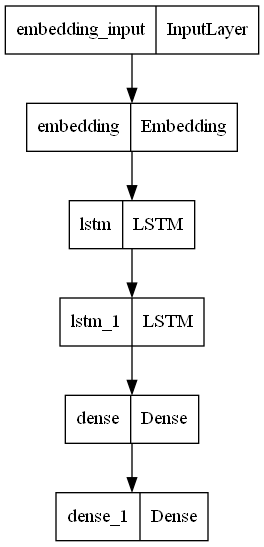

In [36]:
keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [37]:
#Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard

In [38]:
checkpoint = ModelCheckpoint("nextword1.h5", monitor='loss', verbose=1,
save_best_only=True, mode='auto')

In [39]:
reduce = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001, verbose = 1)

In [40]:
logdir='logsnextword1'
tensorboard_Visualization = TensorBoard(log_dir=logdir)

### Callbacks:

In [41]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001),metrics="accuracy")

In [42]:
model.evaluate(X,y)

122/122 [==============================] - 9s 30ms/step - loss: 7.8698 - accuracy: 2.5714e-04


[7.869785785675049, 0.00025713551440276206]

### Compile The Model:

In [42]:
model = model.fit(X, y, epochs=50, batch_size=64, callbacks=[checkpoint, reduce, tensorboard_Visualization])

Epoch 1/50
61/61 [==============================] - ETA: 0s - loss: 7.8753 - accuracy: 5.1427e-04
Epoch 1: loss improved from inf to 7.87532, saving model to nextword1.h5
61/61 [==============================] - 32s 262ms/step - loss: 7.8753 - accuracy: 5.1427e-04 - lr: 0.0010
Epoch 2/50
61/61 [==============================] - ETA: 0s - loss: 7.8586 - accuracy: 0.0026
Epoch 2: loss improved from 7.87532 to 7.85858, saving model to nextword1.h5
61/61 [==============================] - 16s 262ms/step - loss: 7.8586 - accuracy: 0.0026 - lr: 0.0010
Epoch 3/50
61/61 [==============================] - ETA: 0s - loss: 7.8306 - accuracy: 0.0028
Epoch 3: loss improved from 7.85858 to 7.83059, saving model to nextword1.h5
61/61 [==============================] - 17s 272ms/step - loss: 7.8306 - accuracy: 0.0028 - lr: 0.0010
Epoch 4/50
61/61 [==============================] - ETA: 0s - loss: 7.7242 - accuracy: 0.0033
Epoch 4: loss improved from 7.83059 to 7.72423, saving model to nextword1.h5
61/

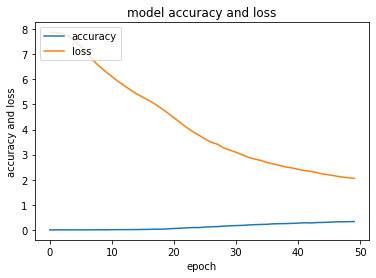

In [43]:
import matplotlib.pyplot as plt
plt.plot(model.history['accuracy'])
plt.plot(model.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='upper left')
plt.show()

In [42]:
model.save_weights("C:\\Users\\deepak\\Downloads\\Set 3\\nextword1.h5")

In [43]:
vocab_array = np.array(list(tokenizer.word_index.keys()))

In [44]:
vocab_array

array(['now', 'gregor', 'well', ..., 'agreed', 'confirmation',
       'destination'], dtype='<U17')

In [45]:
# Importing the Libraries
from tensorflow.keras.models import load_model
import numpy as np
import pickle

In [46]:
# Load the model and tokenizer
model.load_weights("C:\\Users\\deepak\\Downloads\\Set 3\\nextword1.h5")
tokenizer = pickle.load(open("C:\\Users\\deepak\\Downloads\\Set 3\\tokenizer1.pkl", 'rb'))

In [47]:
def make_prediction(text, n_words):
    for i in range(n_words):
        text_tokenize = tokenizer.texts_to_sequences([text])
        text_padded = tf.keras.preprocessing.sequence.pad_sequences(text_tokenize, maxlen=14)
        prediction = np.squeeze(np.argmax(model.predict(text_padded), axis=-1))
        prediction = str(vocab_array[prediction - 1])
        print(vocab_array[np.argsort(model.predict(text_padded)) - 1].ravel()[:-3])
        text += " " + prediction
    return text

In [48]:
make_prediction("at the dull",5)

1/1 [==============================] - 0s 151ms/step
['afraid' 'seriously' 'bin' ... 'convulsive' 'flew' "that'll"]
1/1 [==============================] - 0s 76ms/step
['afraid' 'seriously' 'scurry' ... 'convulsive' 'narrow' "that'll"]
1/1 [==============================] - 0s 69ms/step
['scurry' 'afraid' 'seriously' ... 'opens' 'human' 'narrow']
1/1 [==============================] - 0s 111ms/step
['scurry' 'afraid' 'alert' ... 'illustrated' 'opens' 'fully']
1/1 [==============================] - 0s 64ms/step
['scurry' 'alert' 'afraid' ... 'drawn' 'opens' 'fully']


'at the dull area area area area area'

###### Observation:
    We are able to develop a decent next word prediction model and are able to get a declining loss and an overall
decent performance.